In [3]:
# Screen Time vs Studying Hours - Full Analysis with Hypothesis Testing

# --- 1. Imports ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')


In [4]:
# --- 2. Data Loading ---
file_path = "/content/dataset.csv"

df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

df['Date'] = pd.to_datetime(df['Date'])
df['Total Screen Time (hours)'] = df['Screen time (educational)'] + df['Screen time (non-educational)']

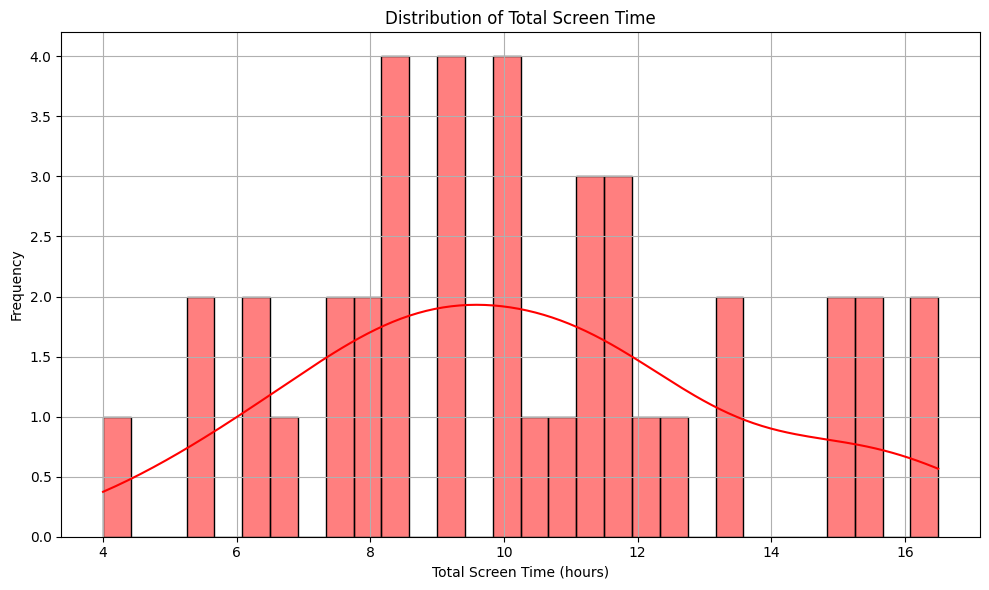

In [5]:
# --- 3. Univariate Analysis ---
## Histogram of Total Screen Time
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Screen Time (hours)'], bins=30, kde=True, color='red')
plt.title('Distribution of Total Screen Time')
plt.xlabel('Total Screen Time (hours)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

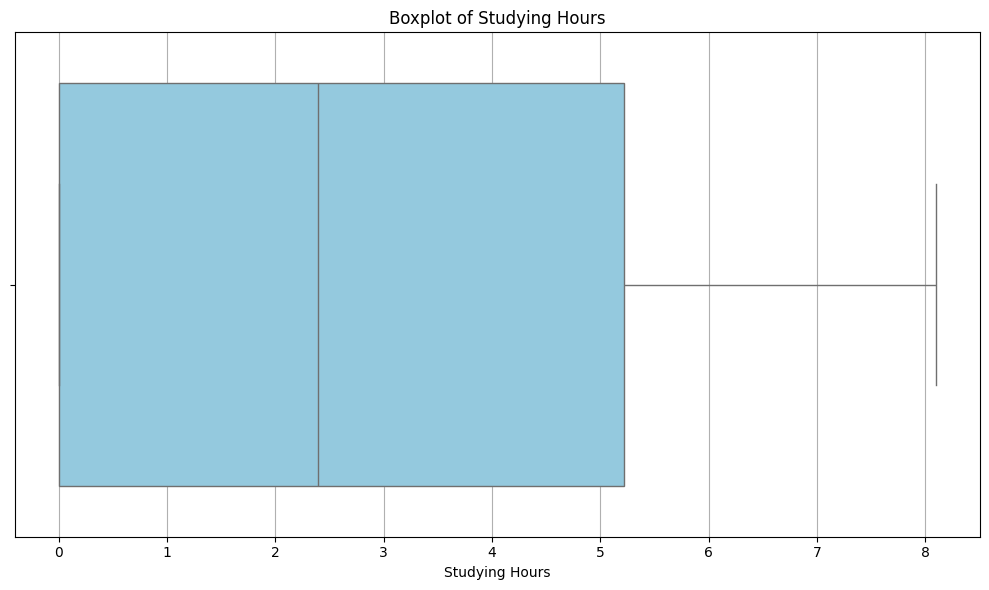

In [6]:
## Boxplot of Studying Hours
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Studying hours'], color='skyblue')
plt.title('Boxplot of Studying Hours')
plt.xlabel('Studying Hours')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


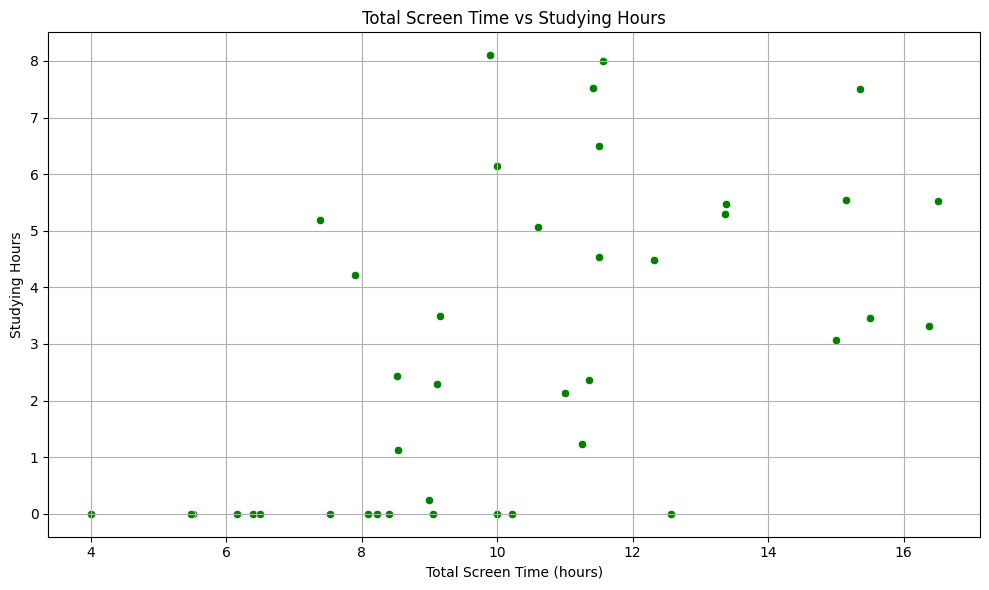

In [7]:
# --- 4. Bivariate Analysis ---
## Scatterplot: Total Screen Time vs Studying Hours
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Screen Time (hours)', y='Studying hours', data=df, color='green')
plt.title('Total Screen Time vs Studying Hours')
plt.xlabel('Total Screen Time (hours)')
plt.ylabel('Studying Hours')
plt.grid(True)
plt.tight_layout()
plt.show()


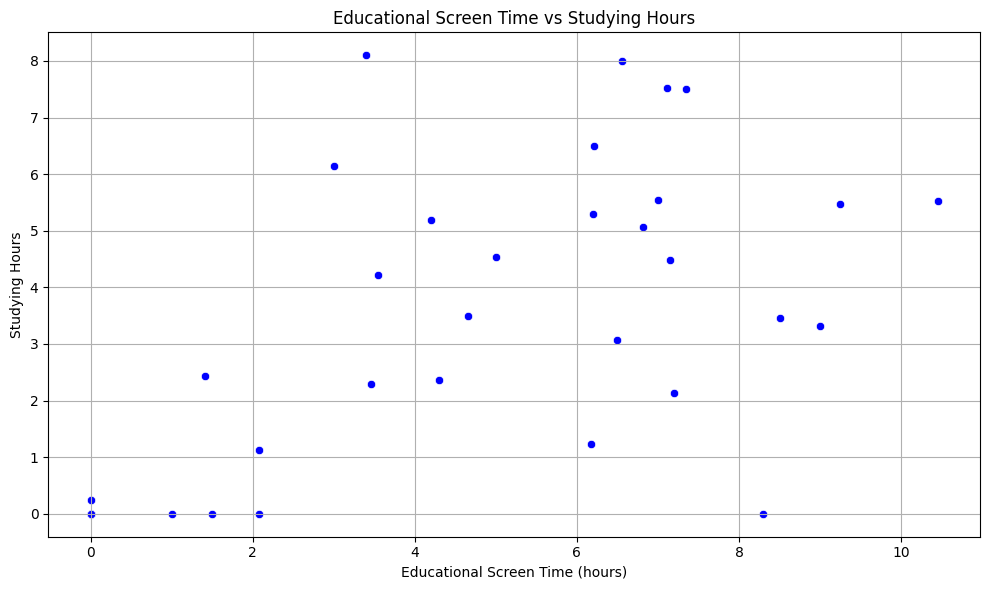

In [8]:
## Scatterplot: Educational Screen Time vs Studying Hours
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Screen time (educational)', y='Studying hours', data=df, color='blue')
plt.title('Educational Screen Time vs Studying Hours')
plt.xlabel('Educational Screen Time (hours)')
plt.ylabel('Studying Hours')
plt.grid(True)
plt.tight_layout()
plt.show()


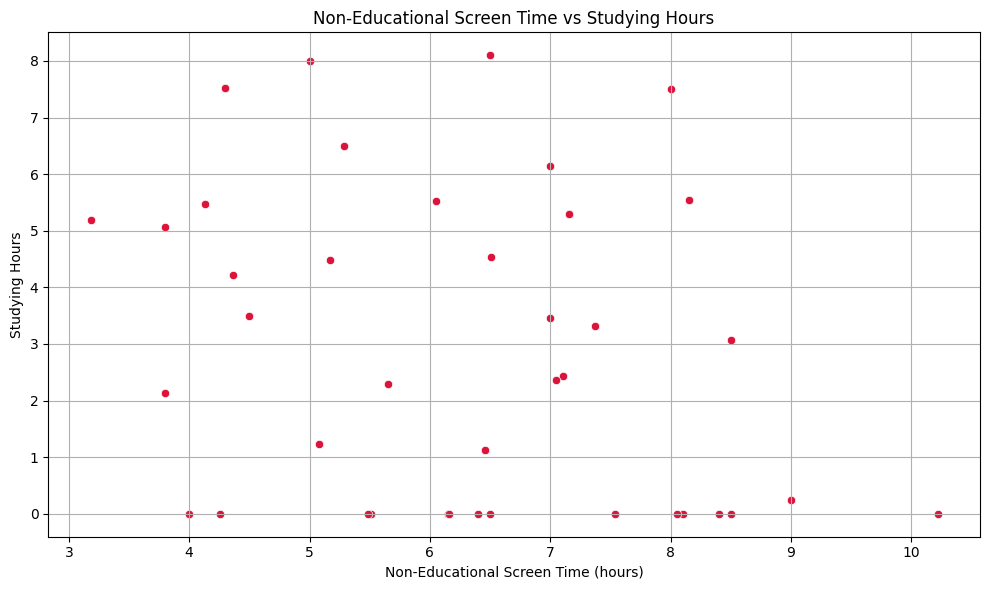

In [9]:
## Scatterplot: Non-Educational Screen Time vs Studying Hours
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Screen time (non-educational)', y='Studying hours', data=df, color='crimson')
plt.title('Non-Educational Screen Time vs Studying Hours')
plt.xlabel('Non-Educational Screen Time (hours)')
plt.ylabel('Studying Hours')
plt.grid(True)
plt.tight_layout()
plt.show()


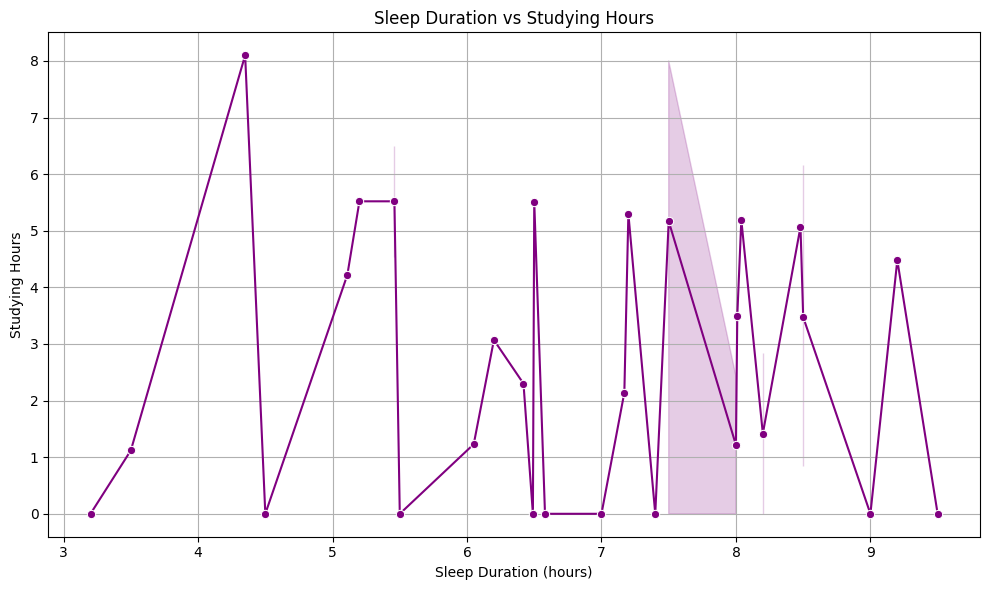

In [10]:
# --- 5. Additional Bivariate Analyses ---
## Sleep Duration vs Studying Hours
plt.figure(figsize=(10, 6))
sns.lineplot(x='Sleep duration', y='Studying hours', data=df, marker='o', color='purple')
plt.title('Sleep Duration vs Studying Hours')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Studying Hours')
plt.grid(True)
plt.tight_layout()
plt.show()

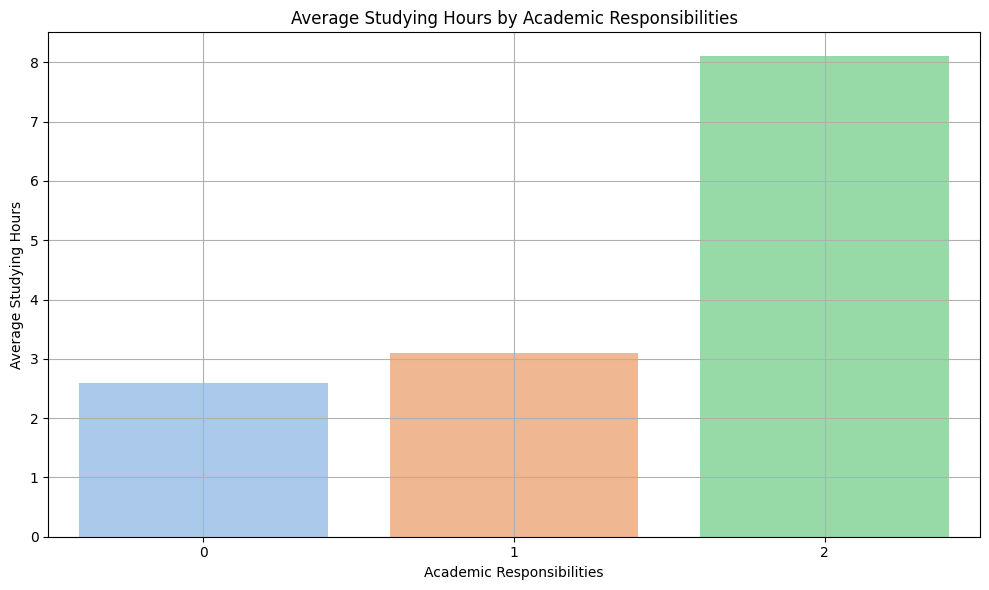

In [11]:
## Barplot: Avg. Study Hours by Academic Responsibilities
plt.figure(figsize=(10, 6))
avg_study = df.groupby('Academic responsibilities')['Studying hours'].mean().reset_index()
sns.barplot(x='Academic responsibilities', y='Studying hours', data=avg_study, palette='pastel')
plt.title('Average Studying Hours by Academic Responsibilities')
plt.xlabel('Academic Responsibilities')
plt.ylabel('Average Studying Hours')
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# --- 6. Boxplot + T-test Based on Screen Time Level ---
## Create Screen Time Groups
median_screen_time = df['Total Screen Time (hours)'].median()
df['ScreenTimeGroup'] = ['High' if x > median_screen_time else 'Low' for x in df['Total Screen Time (hours)']]


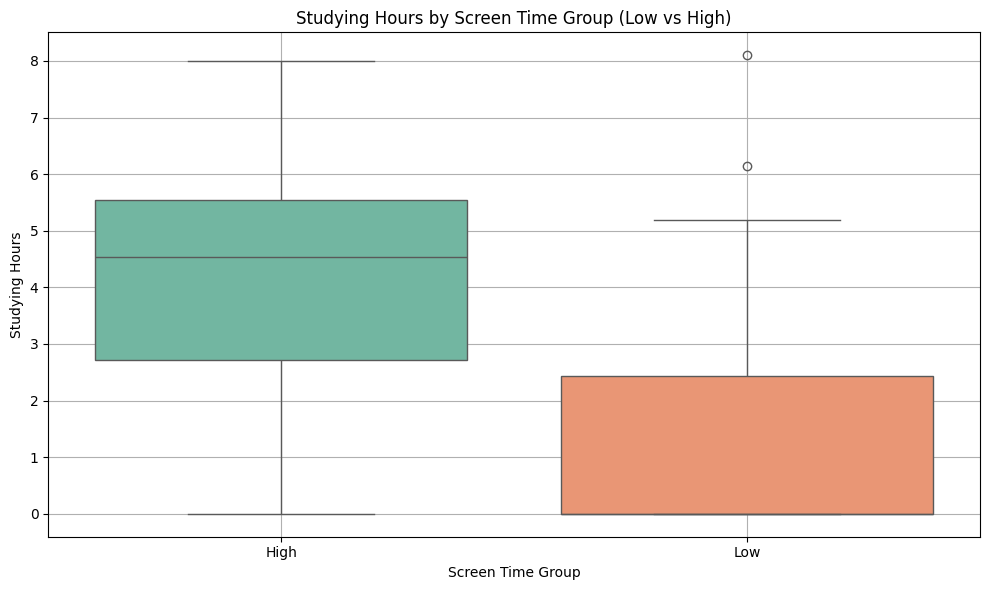

In [13]:
## Boxplot: Studying Hours by Screen Time Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='ScreenTimeGroup', y='Studying hours', data=df, palette='Set2')
plt.title('Studying Hours by Screen Time Group (Low vs High)')
plt.xlabel('Screen Time Group')
plt.ylabel('Studying Hours')
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
## T-Test
low_group = df[df['ScreenTimeGroup'] == 'Low']['Studying hours']
high_group = df[df['ScreenTimeGroup'] == 'High']['Studying hours']
t_stat, p_val = stats.ttest_ind(low_group, high_group)
print(f"T-Test Results:\n - t-statistic: {t_stat:.3f}\n - p-value: {p_val:.4f}")


T-Test Results:
 - t-statistic: -3.492
 - p-value: 0.0012


In [15]:
# --- 7. Correlation Analysis (Pearson) ---
## Pearson Correlation between Total Screen Time and Studying Hours
r_val, p_corr = stats.pearsonr(df['Total Screen Time (hours)'], df['Studying hours'])
print(f"\nPearson Correlation:\n - r: {r_val:.3f}\n - p-value: {p_corr:.4f}")


Pearson Correlation:
 - r: 0.566
 - p-value: 0.0001


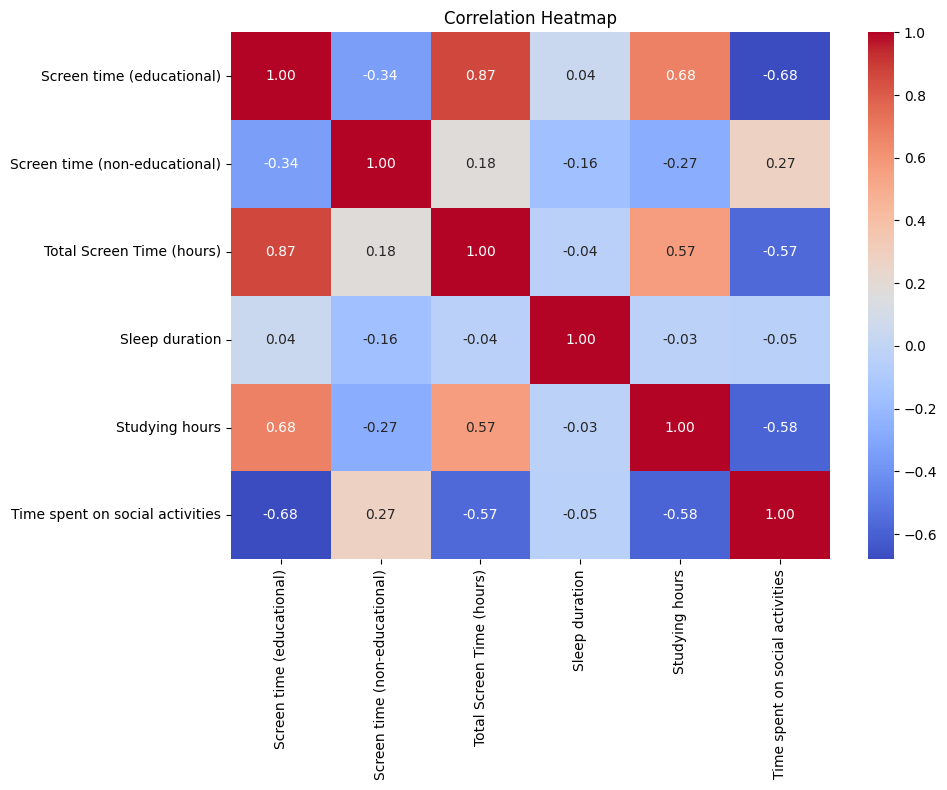

In [16]:
# --- 8. Multivariate Analysis - Heatmap ---
selected_cols = ['Screen time (educational)', 'Screen time (non-educational)', 'Total Screen Time (hours)',
                 'Sleep duration', 'Studying hours', 'Time spent on social activities']
plt.figure(figsize=(10, 8))
sns.heatmap(df[selected_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

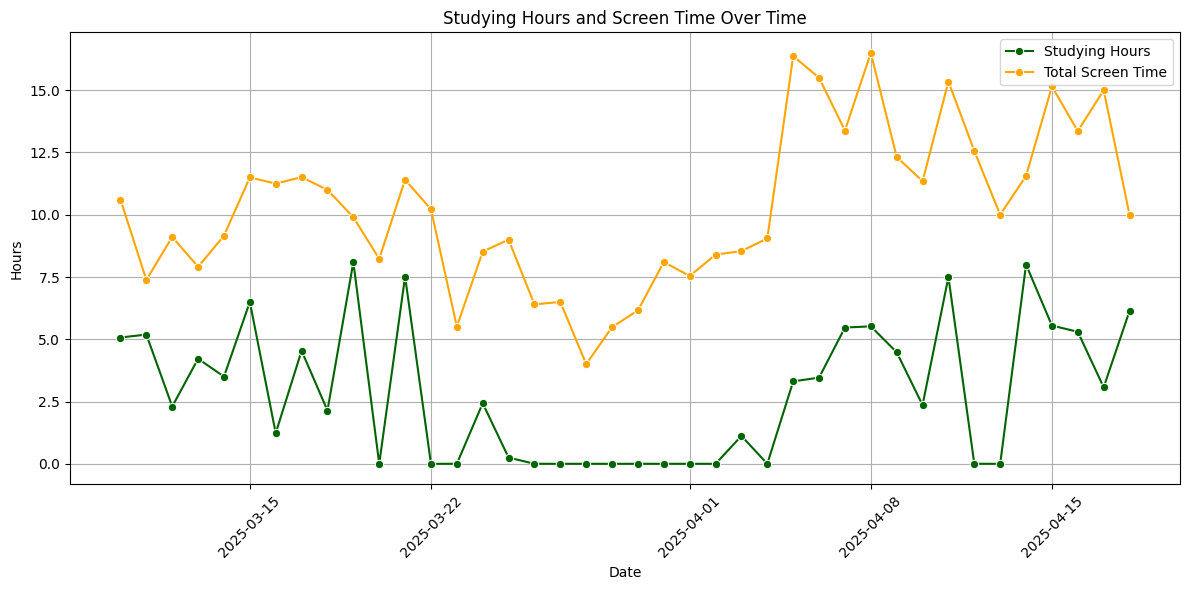

In [17]:
# --- 9. Time Series Plots ---
## Studying Hours and Screen Time Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Studying hours', data=df, marker='o', label='Studying Hours', color='darkgreen')
sns.lineplot(x='Date', y='Total Screen Time (hours)', data=df, marker='o', label='Total Screen Time', color='orange')
plt.title('Studying Hours and Screen Time Over Time')
plt.xlabel('Date')
plt.ylabel('Hours')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
# --- 10.1. Imports for Machine Learning ---
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
# --- 10.2. Feature (X) and Target (y) ---

# Target variable: Studying hours
y = df['Studying hours']

# Features: Independent variables
X = df[['Screen time (educational)', 'Screen time (non-educational)',
        'Sleep duration', 'Academic responsibilities',
        'Time spent on social activities']]

In [20]:
# --- 10.3. Train-Test Split ---

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [21]:
# --- 10.4. Train ML Models and Compare Performance ---

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R²": r2}
    print(f"{name} Results:\n - Mean Squared Error: {mse:.2f}\n - R² Score: {r2:.2f}\n")

Linear Regression Results:
 - Mean Squared Error: 1.66
 - R² Score: 0.59

Decision Tree Results:
 - Mean Squared Error: 5.26
 - R² Score: -0.31

Random Forest Results:
 - Mean Squared Error: 0.93
 - R² Score: 0.77



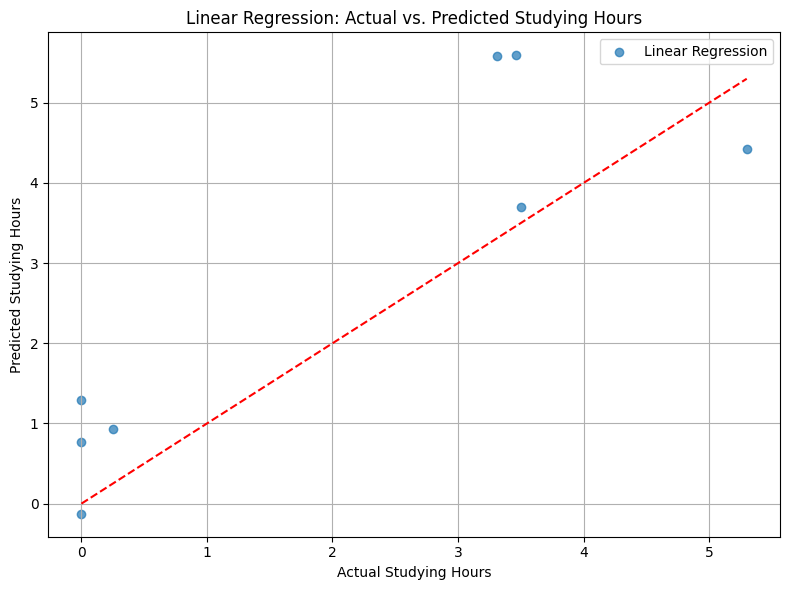

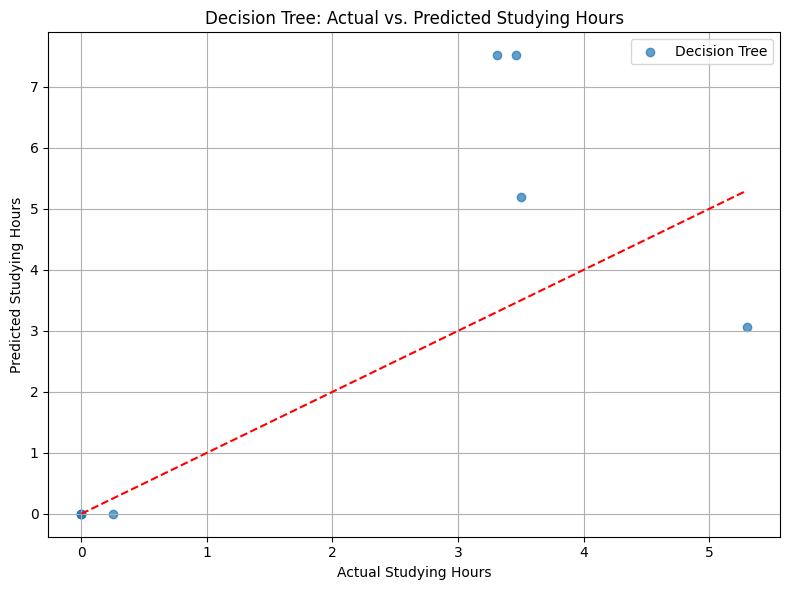

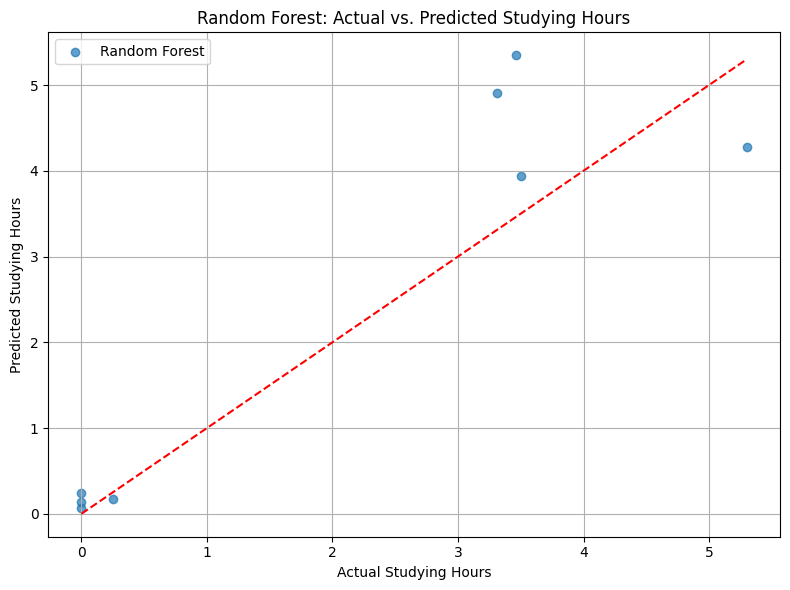

In [22]:
# --- 10.5. Actual vs Predicted Visualization ---

for name, model in models.items():
    y_pred = model.predict(X_test)
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, label=name)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f"{name}: Actual vs. Predicted Studying Hours")
    plt.xlabel("Actual Studying Hours")
    plt.ylabel("Predicted Studying Hours")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [23]:
# --- 10.6. Identify Best Performing ---

best_model = max(results, key=lambda x: results[x]['R²'])
print(f"Best Performing Model: {best_model} with R² = {results[best_model]['R²']:.2f}")

Best Performing Model: Random Forest with R² = 0.77


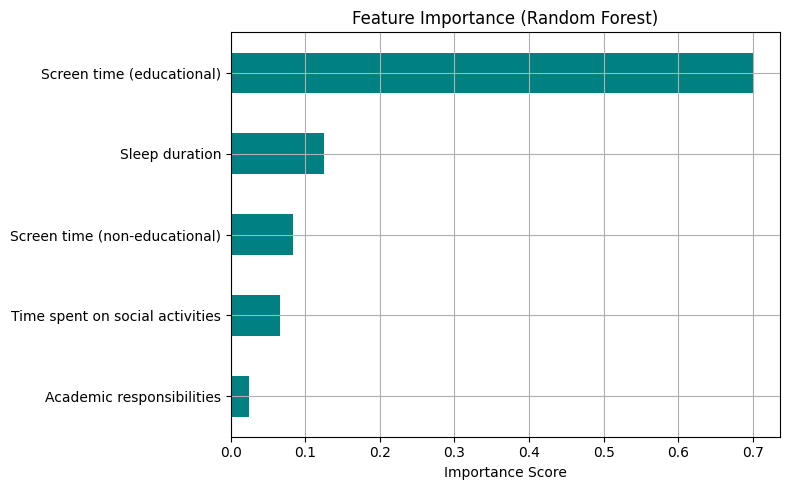

In [24]:
# Only for Random Forest
# --- Feature Importance ---
best_rf = RandomForestRegressor(random_state=42, n_estimators=100)
best_rf.fit(X_train, y_train)

importances = pd.Series(best_rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(8, 5), color='teal')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.grid(True)
plt.tight_layout()
plt.show()


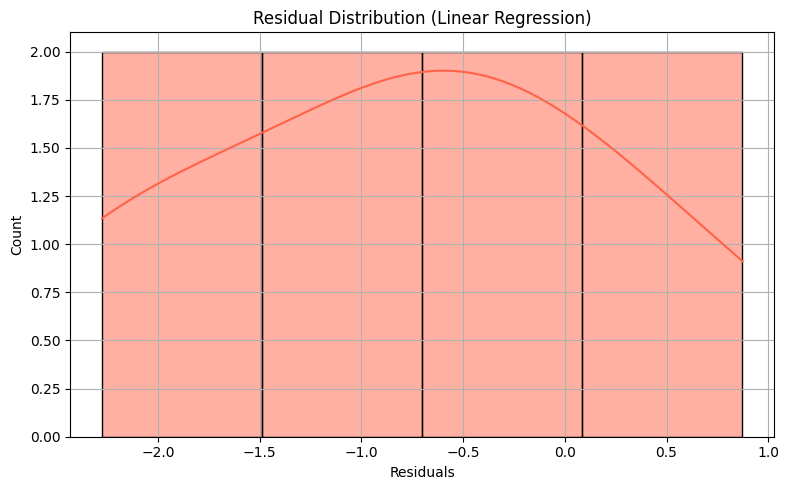

In [25]:
# --- Residual plot for best model ---
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
residuals = y_test - y_pred_lr

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='tomato')
plt.title("Residual Distribution (Linear Regression)")
plt.xlabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()